# Descrição do Trabalho

## Dataset
https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv
https://coinmarketcap.com/currencies/bitcoin/historical-data/

Usaremos as seguintes labels:

- up = 0 (Subiu o preço em relação ao anterior)
- down = 1 (Desceu o preço em relação ao anterior)
- same = 2 (Manteve o preço em relação ao anterior)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
coin = "XRP"

labels = ["up","down","same"]

# Loading Data and preprocessing

In [3]:
raw_data = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/IA2/T2/{coin}-Raw.csv')
print(raw_data.describe())
raw_data["Date"][len(raw_data["Date"])-1]

               SNo         High  ...        Volume     Marketcap
count  2893.000000  2893.000000  ...  2.893000e+03  2.893000e+03
mean   1447.000000     0.246591  ...  1.260299e+09  9.678507e+09
std     835.281489     0.365393  ...  3.137958e+09  1.385907e+10
min       1.000000     0.003082  ...  0.000000e+00  2.196991e+07
25%     724.000000     0.007531  ...  4.780950e+05  2.263168e+08
50%    1447.000000     0.189184  ...  1.119370e+08  7.523251e+09
75%    2170.000000     0.320751  ...  1.238721e+09  1.306444e+10
max    2893.000000     3.841940  ...  3.695518e+10  1.308535e+11

[8 rows x 7 columns]


'2021-07-06 23:59:59'

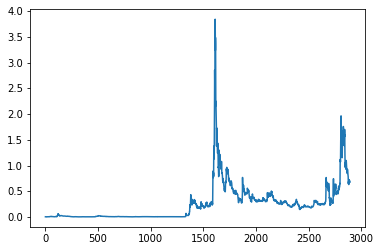

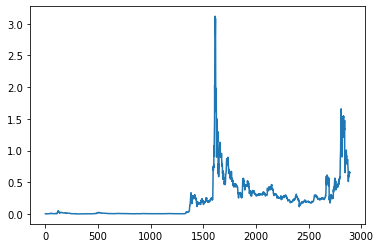

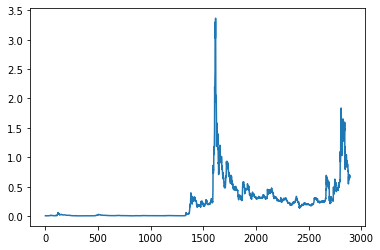

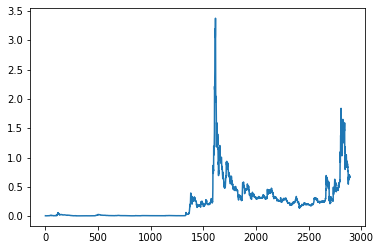

In [ ]:
plt.plot(raw_data["High"])
plt.show()
plt.plot(raw_data["Low"])
plt.show()
plt.plot(raw_data["Open"])
plt.show()
plt.plot(raw_data["Close"])
plt.show()

In [ ]:
'''aux = []
for i in range(len(raw_data)):
  #print(raw_data["Date"][1])
  if(raw_data["Date"][i].split("-")[0] == "2020"):
    break
  aux.append(i)

raw_data=raw_data.drop(aux)
raw_data = raw_data.reset_index()
print(raw_data.describe())'''

In [4]:
def parse_year(x):
  x = str(x)
  return x.split('-')[0]
def parse_month(x):
  x = str(x)
  return int(x.split('-')[1])

raw_data["Year"] = raw_data["Date"].map(parse_year)
raw_data["Month"] = raw_data["Date"].map(parse_month)

raw_data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Year,Month
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.0,4.387916e+07,2013,8
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.0,3.659101e+07,2013,8
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.0,3.453412e+07,2013,8
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.0,3.325863e+07,2013,8
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.0,3.354750e+07,2013,8


In [5]:
variation_tomorrow = []
variation_yesterday = []
variation_last_week = []
for i in range(7,len(raw_data) - 1):
  p_today = raw_data["Close"][i]
  p_yesterday = raw_data["Close"][i-1]
  p_tomorrow = raw_data["Close"][i+1]
  p_last_week = raw_data["Close"][i-7]
  
  #verifica os preços de amanha
  if p_tomorrow>p_today:
    variation_tomorrow.append(0) #amanha vai subir
  else:
    if p_tomorrow<p_today:
      variation_tomorrow.append(1) #amanha vai descer
    else:
      variation_tomorrow.append(2) #amanha vai ficar igual
  
  # verifica os preços de ontem
  if p_yesterday<p_today:
    variation_yesterday.append(0) # subiu de ontem para hoje
  else:
    if p_yesterday>p_today:
      variation_yesterday.append(1) # desceu de ontem para hoje
    else:
      variation_yesterday.append(2) # ficou igual de ontem para hoje


  # verifica os preços de semana passada
  if p_last_week<p_today:
    variation_last_week.append(0) # subiu de semana passada para hoje
  else:
    if p_last_week>p_today:
      variation_last_week.append(1) # desceu de semana passada para hoje
    else:
      variation_last_week.append(2) # ficou igual de semana passada para hoje




variation_tomorrow = np.array(variation_tomorrow)
variation_yesterday = np.array(variation_yesterday)
variation_last_week = np.array(variation_last_week)

In [6]:

raw_data=raw_data.drop([0,1,2,3,4,5,6,len(raw_data)-2])
raw_data=raw_data.drop(['Marketcap',"SNo"], axis=1)
raw_data["Variation Next Day"] = variation_tomorrow
raw_data["Variation Yesterday"] = variation_yesterday
raw_data["Variation Last Week"] = variation_last_week




In [7]:
raw_data.to_csv(f'/content/drive/MyDrive/Colab Notebooks/IA2/T2/{coin}-Processed.csv')
raw_data.head(10)

,Name,Symbol,Date,High,Low,Open,Close,Volume,Year,Month,Variation Next Day,Variation Yesterday,Variation Last Week
7,XRP,XRP,2013-08-12 23:59:59,0.004520,0.004359,0.004414,0.004449,0.0,2013,8,1,0,1
8,XRP,XRP,2013-08-13 23:59:59,0.004463,0.004171,0.004463,0.004245,0.0,2013,8,1,1,1
9,XRP,XRP,2013-08-14 23:59:59,0.004267,0.003785,0.004267,0.003788,0.0,2013,8,1,1,1
10,XRP,XRP,2013-08-15 23:59:59,0.003804,0.003067,0.003788,0.003092,0.0,2013,8,0,1,1
11,XRP,XRP,2013-08-16 23:59:59,0.003162,0.002875,0.003082,0.003134,0.0,2013,8,0,0,1
12,XRP,XRP,2013-08-17 23:59:59,0.005683,0.003138,0.003138,0.005671,0.0,2013,8,1,0,0
13,XRP,XRP,2013-08-18 23:59:59,0.006263,0.005585,0.005687,0.005617,0.0,2013,8,1,1,0
14,XRP,XRP,2013-08-19 23:59:59,0.005839,0.005223,0.005587,0.005260,0.0,2013,8,0,1,0
15,XRP,XRP,2013-08-20 23:59:59,0.006158,0.005309,0.005376,0.006098,0.0,2013,8,0,0,0
16,XRP,XRP,2013-08-21 23:59:59,0.006349,0.005950,0.006098,0.006131,0.0,2013,8,1,0,0


# Building the model

In [ ]:
# Carrega um modelo pre treinado
#model = tf.keras.models.load_model(f'/content/drive/MyDrive/Colab Notebooks/IA2/T2/model-{coin}')

In [8]:
coin_data = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/IA2/T2/{coin}-Processed.csv')
features = ["Year","Month","Open",	"High",	"Low",	"Close",	"Volume","Variation Yesterday","Variation Last Week"]
x,y = [],np.array(coin_data["Variation Next Day"].tolist())
for i in range(len(coin_data)):
  dt = []
  for ft in features:
    dt.append(float(coin_data[ft][i]))
  x.append(np.array(dt))

x = np.array(x)
print(x.shape)
print(y.shape)

(2885, 9)
(2885,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=23)



(2740, 9)


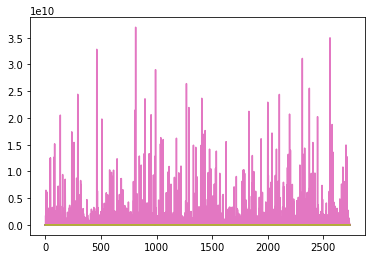

In [10]:
print(X_train.shape)
plt.plot(X_train)
plt.show()

In [11]:
import tensorflow as tf
from tqdm import tqdm

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(60, activation='linear',input_shape=X_train[0].shape),

  tf.keras.layers.Dense(60, activation='relu'),
  
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss="sparse_categorical_crossentropy",
    metrics=["mse","mae","accuracy"],
)
model.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.1,
 'name': 'Adam'}

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 183       
Total params: 4,443
Trainable params: 4,443
Non-trainable params: 0
_________________________________________________________________


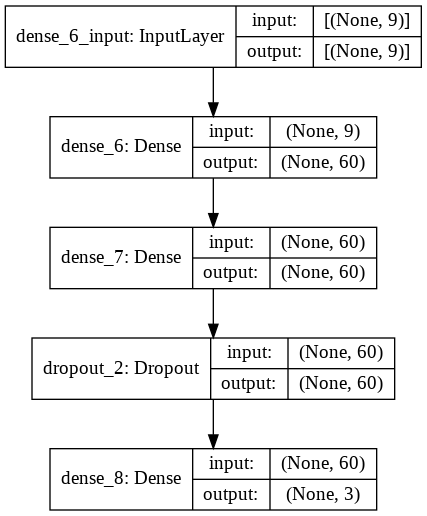

In [29]:

tf.keras.utils.plot_model(model, show_shapes=True)

In [30]:
epochs = 500
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="accuracy", factor=0.9, patience=50, min_lr=0.0000001,verbose = 1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="loss", factor=0.9, patience=100, min_lr=0.00000001,verbose = 1
    )
]
hist = model.fit(X_train, y_train, 
                 epochs=epochs,
                callbacks=callbacks)

print("---------")
model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/500
86/86 [==============================] - 1s 2ms/step - loss: 71513480.0000 - mse: 0.3717 - mae: 0.5090 - accuracy: 0.5139
Epoch 2/500
86/86 [==============================] - 0s 2ms/step - loss: 0.7023 - mse: 0.3419 - mae: 0.5090 - accuracy: 0.5226
Epoch 3/500
86/86 [==============================] - 0s 4ms/step - loss: 0.7002 - mse: 0.3429 - mae: 0.5090 - accuracy: 0.5124
Epoch 4/500
86/86 [==============================] - 0s 2ms/step - loss: 0.6974 - mse: 0.3429 - mae: 0.5090 - accuracy: 0.5091
Epoch 5/500
86/86 [==============================] - 0s 2ms/step - loss: 0.6999 - mse: 0.3443 - mae: 0.5090 - accuracy: 0.5018
Epoch 6/500
86/86 [==============================] - 0s 2ms/step - loss: 0.6999 - mse: 0.3438 - mae: 0.5090 - accuracy: 0.5015
Epoch 7/500
86/86 [==============================] - 0s 2ms/step - loss: 0.6974 - mse: 0.3435 - mae: 0.5090 - accuracy: 0.5234
Epoch 8/500
86/86 [==============================] - 0s 2ms/step - loss: 0.6976 - mse: 0.3434 - mae: 0.5

[0.6892248392105103,
 0.35309556126594543,
 0.5195402503013611,
 0.5586206912994385]

In [31]:

batch = 50

aux = 0
lss = []
for i in range(len(hist.history['loss'])):
  aux+=hist.history['loss'][i]
  if i%batch == 0 and i != 0:
    lss.append(aux/batch)
    aux = 0

aux = 0
acc = []
for i in range(len(hist.history['accuracy'])):
  aux+=hist.history['accuracy'][i]
  if i%batch == 0 and i != 0:
    acc.append(aux/batch)
    aux = 0


aux = 0
mse = []
for i in range(len(hist.history['mse'])):
  aux+=hist.history['mse'][i]
  if i%batch == 0 and i != 0:
    mse.append(aux/batch)
    aux = 0

aux = 0
mae = []
for i in range(len(hist.history['mae'])):
  aux+=hist.history['mae'][i]
  if i%batch == 0 and i != 0:
    mae.append(aux/batch)
    aux = 0

In [ ]:
hist1 = hist

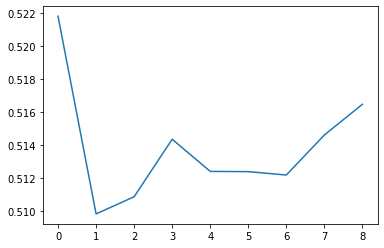

In [34]:
plt.plot(acc)
plt.show()

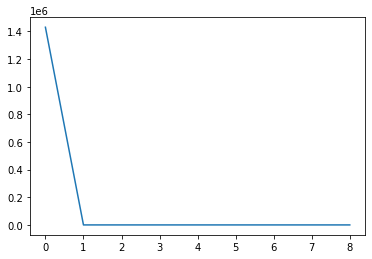

In [32]:
plt.plot(lss)
plt.show()

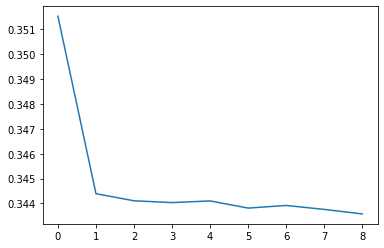

In [33]:
plt.plot(mse)
plt.show()

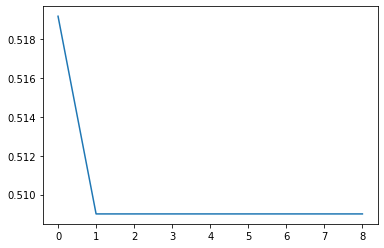

In [35]:
plt.plot(mae)
plt.show()

### Comparando com o aleatorio

In [36]:
for i  in (range(len(X_test))):
  (entry,expected) = (X_test[i],y_test[i])
  res = model.predict(np.array([ entry]))[0]
  
  if labels[res.argmax()] == labels[expected]:
    print(f'{res} -> The model is {int(res[res.argmax()]*10000)/100}% sure that the price will go {labels[res.argmax()]} ')

[4.7728643e-01 5.2236331e-01 3.5024737e-04] -> The model is 52.23% sure that the price will go down 
[4.7728643e-01 5.2236331e-01 3.5024737e-04] -> The model is 52.23% sure that the price will go down 
[4.7728643e-01 5.2236331e-01 3.5024737e-04] -> The model is 52.23% sure that the price will go down 
[4.7728643e-01 5.2236331e-01 3.5024737e-04] -> The model is 52.23% sure that the price will go down 
[4.7728643e-01 5.2236331e-01 3.5024737e-04] -> The model is 52.23% sure that the price will go down 
[4.7728643e-01 5.2236331e-01 3.5024737e-04] -> The model is 52.23% sure that the price will go down 
[4.7728643e-01 5.2236331e-01 3.5024737e-04] -> The model is 52.23% sure that the price will go down 
[4.7728643e-01 5.2236331e-01 3.5024737e-04] -> The model is 52.23% sure that the price will go down 
[4.7728643e-01 5.2236331e-01 3.5024737e-04] -> The model is 52.23% sure that the price will go down 
[4.7728643e-01 5.2236331e-01 3.5024737e-04] -> The model is 52.23% sure that the price will

testando o modelo


100%|██████████| 145/145 [00:05<00:00, 25.64it/s]


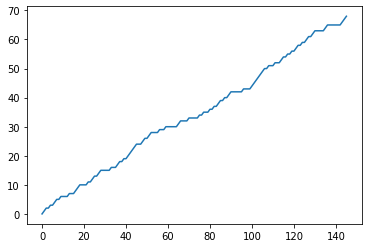

Testando o random


100%|██████████| 145/145 [00:00<00:00, 363089.00it/s]


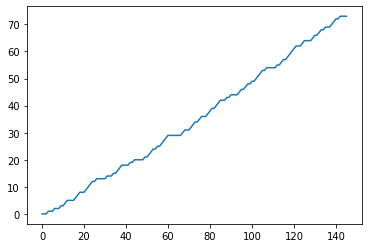

Modelo: Acertou 68 de 145 ->  46.89655172413793%
Random: Acertou 73 de 145 ->  50.3448275862069%


In [23]:
results = [0],[0]
print("testando o modelo")
for i  in tqdm(range(len(X_test))):
  (entry,expected) = (X_test[i],y_test[i])
  res = model.predict(np.array([ entry]))[0]
  
  if labels[res.argmax()] == labels[expected]:
    results[0].append(results[0][len(results[0])-1]+1)
  else:
    results[0].append(results[0][len(results[0])-1])

plt.plot(results[0])
plt.show()

print("Testando o random")
from random import random
for i  in tqdm(range(len(X_test))):
  (entry,expected) = (X_test[i],y_test[i])
  
  if labels[int(random()*1000)%2] == labels[expected]:
    results[1].append(results[1][len(results[1])-1]+1)
  else:
    results[1].append(results[1][len(results[1])-1])

plt.plot(results[1])
plt.show()
ran = results[1][len(results[1])-1]
mod = results[0][len(results[0])-1]
print(f'Modelo: Acertou {mod} de {len(y_test)} ->  {100*mod/len(y_test)}%')
print(f'Random: Acertou {ran} de {len(y_test)} ->  {100*ran/len(y_test)}%')

## BTC
| Date | Open | High | Low | Close | Volume | Market Cap |
|---|---|---|---|---|---|---|
| Aug 08 2021 | 44574.44 | 45282.35 | 43331.91 | 43798.12 | 36302664750 | 822545074286 |
| Aug 07 2021 | 42832.80 | 44689.86 | 42618.57 | 44555.80 | 40030862141 | 836730623772 |
| Aug 06 2021 | 40865.87 | 43271.66 | 39932.18 | 42816.50 | 38226483046 | 804022903682 |
| Aug 05 2021 | 39744.51 | 41341.93 | 37458.00 | 40869.55 | 35185031017 | 767423192906 |
| Aug 04 2021 | 38213.33 | 39952.30 | 37589.17 | 39747.51 | 25372562724 | 746313542791 |

## XMR
| Date | Open | High | Low | Close | Volume | Market Cap |
|---|---|---|---:|---:|---:|---:|
| Aug 13 2021 | 257.53 | 273.21 | 255.23 | 273.07 | 227228996 | 4907709964 |
| Aug 12 2021 | 268.56 | 276.41 | 252.56 | 257.10 | 236282587 | 4620528451 |
| Aug 11 2021 | 266.40 | 279.41 | 266.02 | 268.57 | 241730740 | 4826530321 |
| Aug 10 2021 | 269.73 | 270.78 | 260.53 | 266.17 | 228553925 | 4783279492 |
| Aug 09 2021 | 257.15 | 271.75 | 253.82 | 270.19 | 228186214 | 4855241722 |
| Aug 08 2021 | 271.34 | 274.52 | 256.28 | 256.85 | 227195719 | 4615475192 |
| Aug 07 2021 | 262.96 | 275.88 | 259.61 | 270.98 | 233040691 | 4869129158 |
| Aug 06 2021 | 252.88 | 266.35 | 250.83 | 263.04 | 260143244 | 4726236998 |
| Aug 05 2021 | 245.09 | 253.83 | 237.32 | 252.86 | 245048086 | 4543253747 |
| Aug 04 2021 | 225.63 | 245.65 | 223.15 | 244.97 | 217332184 | 4401263016 |
| Aug 03 2021 | 232.80 | 236.76 | 223.67 | 225.20 | 181967424 | 4045869297 |
| Aug 02 2021 | 236.00 | 244.15 | 228.63 | 233.07 | 183571683 | 4187141800 |
| Aug 01 2021 | 239.66 | 249.38 | 232.57 | 236.23 | 196766251 | 4243833052 |



In [ ]:
print(features)

['Year', 'Month', 'Open', 'High', 'Low', 'Close', 'Volume', 'Variation Yesterday', 'Variation Last Week']


In [24]:
import math

In [37]:
res = model.predict(np.array([ [2021,8,269.73,	270.78,	260.53,	266.17,	22855392,1,0]	])) #10/08
res = res[0]
print(res)
print(labels[res.argmax()]) # should be up
res.sum()

[4.7728643e-01 5.2236331e-01 3.5024737e-04]
down


1.0

In [38]:
res = model.predict(np.array([ [2021,8,257.15,	271.75,	253.82,	270.19,	228186214,0,1]])) #9/08
res = res[0]
print(res)
print(labels[res.argmax()])  # should be down

[4.7728643e-01 5.2236331e-01 3.5024737e-04]
down


In [ ]:
model.save(f'/content/drive/MyDrive/Colab Notebooks/IA2/T2/model-{coin}')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/IA2/T2/model-XRP/assets
